**데이터셋**

- 2016/9/4 ~ 2018/10/17 간의 데이터
- 데이터 출처: https://www.kaggle.com/olistbr/brazilian-ecommerce?select=olist_sellers_dataset.csv

**목표**

- 현재 상황 파악하여 매출 개선 계획

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 파악

### 데이터 불러오기

In [3]:
order_items = pd.read_csv('./archive_01/olist_order_items_dataset.csv')
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [4]:
products = pd.read_csv('./archive_01/olist_products_dataset.csv')
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [5]:
category_traslation = pd.read_csv('./archive_01/product_category_name_translation.csv')
category_traslation

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [6]:
orders = pd.read_csv('./archive_01/olist_orders_dataset.csv')
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


데이터 설명

- order_items: 주문 1건 당 해당 주문 id, 물건 개수, 상품 id, 판매자 id, 배송 기한, 상품 가격, 배송비
- products: 판매 중인 상품들의 카테고리, 이름 및 설명 길이, 제품 사진, 크기 정보
- category_traslation: 각 카테고리 이름 ‘포르투갈어 → 영어’ 번역본
- orders: 주문 1건 당 해당 주문 id, 고객 id, 주문 상태 정보와 해당 상태가 된 날짜

### 데이터 전처리

**products**

In [7]:
# 데이터 훑어보기

products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [8]:
# 현재 필요한 것은 product_id 와  category name 이다. 해당 칼럼만 잘라내기

products = products[['product_id', 'product_category_name']]
products

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas
...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios


In [9]:
# info 확인해보니 null값이 존재하는 것 파악.
products.isna().sum()

product_id                 0
product_category_name    610
dtype: int64

In [10]:
# 총 32951개 상품 중 610개 상품의 카테고리 이름이 없음. 
# 이는 전체 상품 중 약 1.85% 정도. 매우 적다.
610/32951 * 100

1.8512336499650999

In [11]:
#수기로 5개 정도 확인해본 결과 대부분 1~2개정도 구입된 것으로 추정.
products['product_id'][products['product_category_name'].isnull()]

105      a41e356c76fab66334f36de622ecbd3a
128      d8dee61c2034d6d075997acef1870e9b
145      56139431d72cd51f19eb9f7dae4d1617
154      46b48281eb6d663ced748f324108c733
197      5fb61f482620cb672f5e586bb132eae9
                       ...               
32515    b0a0c5dd78e644373b199380612c350a
32589    10dbe0fbaa2c505123c17fdc34a63c56
32616    bd2ada37b58ae94cc838b9c0569fecd8
32772    fa51e914046aab32764c41356b9d4ea4
32852    c4ceee876c82b8328e9c293fa0e1989b
Name: product_id, Length: 610, dtype: object

In [12]:
order_items[order_items['product_id'] == 'b0a0c5dd78e644373b199380612c350a']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
103749,eb9afe3c048ef7be0e99305193ee4ded,2,b0a0c5dd78e644373b199380612c350a,0c8380b62e38e8a1e6adbeba7eb9688c,2017-04-03 19:55:20,89.9,20.95


In [13]:
# 따라서 해당 610개 상품은 'unclassified'로 분류

products['product_category_name'][products['product_category_name'].isnull()] = 'unclassified'
products['product_category_name'].value_counts()

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 74, dtype: int64

**products의 product_category_name을 영어로 바꾸기**

In [14]:
category_traslation['product_category_name'].nunique()

71

In [15]:
# 그런데 products 와 category_traslation의 개수가 다르다. 74, 71

In [16]:
# 일단 두 데이터 프레임을 merge 
products_merge_outer = pd.merge(products,category_traslation, how='outer',on='product_category_name')
products_merge_outer

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,perfumery
...,...,...,...
32946,13b25797ad1e6d6c7cd3cbeb35f8ee7a,moveis_colchao_e_estofado,furniture_mattress_and_upholstery
32947,dc36a7859b743d8610a2bbbaea26ece9,moveis_colchao_e_estofado,furniture_mattress_and_upholstery
32948,107fde0930956120d1e13dd1062fbb46,moveis_colchao_e_estofado,furniture_mattress_and_upholstery
32949,726b4e18f00255e2e63491bcba3f60b8,moveis_colchao_e_estofado,furniture_mattress_and_upholstery


In [17]:
# 어떤 카테고리 이름이 번역되지 않았는지 찾기
set(products['product_category_name'].unique()) - set(category_traslation['product_category_name'].unique())

{'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos', 'unclassified'}

In [18]:
#번역되지 않은 카테고리는 수기로 변경
products_merge_outer['product_category_name_english'][products_merge_outer['product_category_name'] == 'pc_gamer'] = 'pc_gamer'
products_merge_outer['product_category_name_english'][products_merge_outer['product_category_name'] == 'portateis_cozinha_e_preparadores_de_alimentos'] = 'portable_kitchen_and_food_preparation'
products_merge_outer['product_category_name_english'][products_merge_outer['product_category_name'] == 'unclassified'] = 'unclassified'

In [19]:
# 결측값 다 채워졌는지 확인
products_merge_outer.isna().sum()

product_id                       0
product_category_name            0
product_category_name_english    0
dtype: int64

In [20]:
# 마지막으로 사용하지 않을 행(product_category_name) 버리고 최종 사용할 변수에 할당
products = products_merge_outer.drop(['product_category_name'], axis = 1)
products

,product_id,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumery
...,...,...
32946,13b25797ad1e6d6c7cd3cbeb35f8ee7a,furniture_mattress_and_upholstery
32947,dc36a7859b743d8610a2bbbaea26ece9,furniture_mattress_and_upholstery
32948,107fde0930956120d1e13dd1062fbb46,furniture_mattress_and_upholstery
32949,726b4e18f00255e2e63491bcba3f60b8,furniture_mattress_and_upholstery


**order_items**

In [21]:
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [22]:
# products를 합치면 하나로 볼 수 있음
order_merge_outer = pd.merge(order_items,products, how='outer', on='product_id')
order_merge_outer

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff
...,...,...,...,...,...,...,...,...
112645,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,garden_tools
112646,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,furniture_decor
112647,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.0,20.91,watches_gifts
112648,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,sports_leisure


In [23]:
# 대략적인 정보 확인 후 추가 정리
order_merge_outer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   product_category_name_english  112650 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 7.7+ MB


In [24]:
# 각 열 정보 확인 후 필요 없는 열 drop
order_merge_outer['shipping_limit_date'].value_counts()

2017-07-21 18:25:23    21
2018-03-01 02:50:48    21
2017-08-30 14:30:23    20
2017-02-03 21:44:49    15
2017-12-21 02:30:41    15
                       ..
2018-02-05 10:35:39     1
2017-05-05 17:05:43     1
2017-05-17 21:30:15     1
2017-05-10 16:03:24     1
2018-06-12 17:10:13     1
Name: shipping_limit_date, Length: 93318, dtype: int64

In [25]:
order_items = order_merge_outer.drop(['shipping_limit_date'], axis = 1)
order_items

,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,17.96,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.9,18.33,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,16.17,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,cool_stuff
...,...,...,...,...,...,...,...
112645,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,129.9,51.20,garden_tools
112646,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,99.0,13.52,furniture_decor
112647,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,736.0,20.91,watches_gifts
112648,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,229.9,44.02,sports_leisure


**orders**

In [26]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [27]:
#orders의 전체 정보
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [28]:
# orders를 order_items 에 order_id 기준으로 합친다.
orders_merge_left = pd.merge(order_items,orders, how='left', on='order_id')
orders_merge_left

,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name_english,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,17.96,cool_stuff,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26 00:00:00
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.9,18.33,cool_stuff,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07 00:00:00
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,16.17,cool_stuff,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25 00:00:00
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,cool_stuff,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,129.9,51.20,garden_tools,050309b91cc5e04e68841938e7984aaf,delivered,2018-07-13 20:04:05,2018-07-13 20:23:55,2018-07-17 10:03:00,2018-07-23 19:44:45,2018-08-07 00:00:00
112646,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,99.0,13.52,furniture_decor,11e0f43ab4e2d2c48348dd9332c0ef80,delivered,2018-08-18 10:00:59,2018-08-18 10:10:11,2018-08-20 10:01:00,2018-08-21 12:18:57,2018-08-23 00:00:00
112647,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,736.0,20.91,watches_gifts,dec8952e97ef6124259c56914fb3569c,delivered,2017-06-01 16:53:03,2017-06-01 17:05:23,2017-06-02 11:49:53,2017-06-08 13:04:40,2017-06-26 00:00:00
112648,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,229.9,44.02,sports_leisure,a5201e1a6d71a8d21e869151bd5b4085,delivered,2017-12-18 16:33:07,2017-12-18 17:33:04,2017-12-20 18:55:00,2018-01-08 18:23:10,2018-01-24 00:00:00


In [29]:
# order_purchase_timestamp (날짜) 오름차순으로 정렬
orders_merge_left = orders_merge_left.sort_values('order_purchase_timestamp')
orders_merge_left

,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name_english,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73703,2e7a8482f6fb09756ca50c10d7bfc047,2,f293394c72c9b5fafd7023301fc21fc2,1554a68530182680ad5c8b042c3ab563,32.90,31.67,furniture_decor,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaN,2016-10-20 00:00:00
17757,2e7a8482f6fb09756ca50c10d7bfc047,1,c1488892604e4ba5cff5b4eb4d595400,1554a68530182680ad5c8b042c3ab563,39.99,31.67,furniture_decor,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaN,2016-10-20 00:00:00
110363,e5fa5a7210941f7d56d0208e4e071d35,1,f3c2d01a84c947b078e32bbef0718962,a425f92c199eb576938df686728acd20,59.50,15.56,telephony,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaN,NaN,2016-10-28 00:00:00
78217,bfbd0f9bdef84302105ad712db648a6c,3,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,44.99,2.83,health_beauty,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00
78216,bfbd0f9bdef84302105ad712db648a6c,2,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,44.99,2.83,health_beauty,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43035,0b223d92c27432930dfe407c6aea3041,1,2b4472df15512a2825ae86fd9ae79335,67bf6941ba2f1fa1d02c375766bc3e53,209.00,46.48,kitchen_dining_laundry_garden_furniture,e60df9449653a95af4549bbfcb18a6eb,delivered,2018-08-29 14:18:23,2018-08-29 14:31:07,2018-08-29 15:29:00,2018-08-30 16:24:55,2018-09-04 00:00:00
1906,168626408cb32af0ffaf76711caae1dc,1,bdcf6a834e8faa30dac3886c7a58e92e,2a84855fd20af891be03bc5924d2b453,45.90,15.39,health_beauty,6e353700bc7bcdf6ebc15d6de16d7002,delivered,2018-08-29 14:18:28,2018-08-29 14:30:23,2018-08-29 18:51:00,2018-08-30 16:52:31,2018-09-11 00:00:00
25770,03ef5dedbe7492bdae72eec50764c43f,1,c7f27c5bef2338541c772b5776403e6a,7d7866a99a8656a42c7ff6352a433410,24.90,8.33,party_supplies,496630b6740bcca28fce9ba50d8a26ef,delivered,2018-08-29 14:52:00,2018-08-29 15:05:22,2018-08-29 20:01:00,2018-08-30 16:36:59,2018-09-03 00:00:00
12722,35a972d7f8436f405b56e36add1a7140,1,d04857e7b4b708ee8b8b9921163edba3,9f505651f4a6abe901a56cdc21508025,84.99,8.76,computers_accessories,898b7fee99c4e42170ab69ba59be0a8b,delivered,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-08-29 16:57:00,2018-08-30 16:23:36,2018-09-05 00:00:00


In [30]:
orders_merge_left.info()
#null 값, 사용하지 않을 컬럼 정리

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 73703 to 86901
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   price                          112650 non-null  float64
 5   freight_value                  112650 non-null  float64
 6   product_category_name_english  112650 non-null  object 
 7   customer_id                    112650 non-null  object 
 8   order_status                   112650 non-null  object 
 9   order_purchase_timestamp       112650 non-null  object 
 10  order_approved_at              112635 non-null  object 
 11  order_delivered_carrier_date   111456 non-null  object 
 12  order_delivered_customer_da

In [31]:
# canceled/unavailable 건은 취소/주문 불가이기 때문에 집계에서 제외
orders_cleaning = orders_merge_left.loc[(orders_merge_left['order_status'] != 'canceled') & (orders_merge_left['order_status'] != 'unavailable')]
orders_cleaning

,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name_english,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73703,2e7a8482f6fb09756ca50c10d7bfc047,2,f293394c72c9b5fafd7023301fc21fc2,1554a68530182680ad5c8b042c3ab563,32.90,31.67,furniture_decor,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaN,2016-10-20 00:00:00
17757,2e7a8482f6fb09756ca50c10d7bfc047,1,c1488892604e4ba5cff5b4eb4d595400,1554a68530182680ad5c8b042c3ab563,39.99,31.67,furniture_decor,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaN,2016-10-20 00:00:00
78217,bfbd0f9bdef84302105ad712db648a6c,3,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,44.99,2.83,health_beauty,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00
78216,bfbd0f9bdef84302105ad712db648a6c,2,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,44.99,2.83,health_beauty,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00
78215,bfbd0f9bdef84302105ad712db648a6c,1,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,44.99,2.83,health_beauty,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43035,0b223d92c27432930dfe407c6aea3041,1,2b4472df15512a2825ae86fd9ae79335,67bf6941ba2f1fa1d02c375766bc3e53,209.00,46.48,kitchen_dining_laundry_garden_furniture,e60df9449653a95af4549bbfcb18a6eb,delivered,2018-08-29 14:18:23,2018-08-29 14:31:07,2018-08-29 15:29:00,2018-08-30 16:24:55,2018-09-04 00:00:00
1906,168626408cb32af0ffaf76711caae1dc,1,bdcf6a834e8faa30dac3886c7a58e92e,2a84855fd20af891be03bc5924d2b453,45.90,15.39,health_beauty,6e353700bc7bcdf6ebc15d6de16d7002,delivered,2018-08-29 14:18:28,2018-08-29 14:30:23,2018-08-29 18:51:00,2018-08-30 16:52:31,2018-09-11 00:00:00
25770,03ef5dedbe7492bdae72eec50764c43f,1,c7f27c5bef2338541c772b5776403e6a,7d7866a99a8656a42c7ff6352a433410,24.90,8.33,party_supplies,496630b6740bcca28fce9ba50d8a26ef,delivered,2018-08-29 14:52:00,2018-08-29 15:05:22,2018-08-29 20:01:00,2018-08-30 16:36:59,2018-09-03 00:00:00
12722,35a972d7f8436f405b56e36add1a7140,1,d04857e7b4b708ee8b8b9921163edba3,9f505651f4a6abe901a56cdc21508025,84.99,8.76,computers_accessories,898b7fee99c4e42170ab69ba59be0a8b,delivered,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-08-29 16:57:00,2018-08-30 16:23:36,2018-09-05 00:00:00


In [32]:
# 사용할 행만 별도 추출
orders_cleaning.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id', 'price',
       'freight_value', 'product_category_name_english', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date'],
      dtype='object')

In [33]:
orders_cleaned = orders_cleaning[['order_id', 'order_item_id', 'product_id', 'seller_id', 'price', 'freight_value', 'product_category_name_english', 'customer_id', 'order_purchase_timestamp']]
orders_cleaned

,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name_english,customer_id,order_purchase_timestamp
73703,2e7a8482f6fb09756ca50c10d7bfc047,2,f293394c72c9b5fafd7023301fc21fc2,1554a68530182680ad5c8b042c3ab563,32.90,31.67,furniture_decor,08c5351a6aca1c1589a38f244edeee9d,2016-09-04 21:15:19
17757,2e7a8482f6fb09756ca50c10d7bfc047,1,c1488892604e4ba5cff5b4eb4d595400,1554a68530182680ad5c8b042c3ab563,39.99,31.67,furniture_decor,08c5351a6aca1c1589a38f244edeee9d,2016-09-04 21:15:19
78217,bfbd0f9bdef84302105ad712db648a6c,3,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,44.99,2.83,health_beauty,86dc2ffce2dfff336de2f386a786e574,2016-09-15 12:16:38
78216,bfbd0f9bdef84302105ad712db648a6c,2,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,44.99,2.83,health_beauty,86dc2ffce2dfff336de2f386a786e574,2016-09-15 12:16:38
78215,bfbd0f9bdef84302105ad712db648a6c,1,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,44.99,2.83,health_beauty,86dc2ffce2dfff336de2f386a786e574,2016-09-15 12:16:38
...,...,...,...,...,...,...,...,...,...
43035,0b223d92c27432930dfe407c6aea3041,1,2b4472df15512a2825ae86fd9ae79335,67bf6941ba2f1fa1d02c375766bc3e53,209.00,46.48,kitchen_dining_laundry_garden_furniture,e60df9449653a95af4549bbfcb18a6eb,2018-08-29 14:18:23
1906,168626408cb32af0ffaf76711caae1dc,1,bdcf6a834e8faa30dac3886c7a58e92e,2a84855fd20af891be03bc5924d2b453,45.90,15.39,health_beauty,6e353700bc7bcdf6ebc15d6de16d7002,2018-08-29 14:18:28
25770,03ef5dedbe7492bdae72eec50764c43f,1,c7f27c5bef2338541c772b5776403e6a,7d7866a99a8656a42c7ff6352a433410,24.90,8.33,party_supplies,496630b6740bcca28fce9ba50d8a26ef,2018-08-29 14:52:00
12722,35a972d7f8436f405b56e36add1a7140,1,d04857e7b4b708ee8b8b9921163edba3,9f505651f4a6abe901a56cdc21508025,84.99,8.76,computers_accessories,898b7fee99c4e42170ab69ba59be0a8b,2018-08-29 15:00:37


In [34]:
#index 정리
orders_integrated = orders_cleaned.reset_index(drop = True)
orders_integrated

,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name_english,customer_id,order_purchase_timestamp
0,2e7a8482f6fb09756ca50c10d7bfc047,2,f293394c72c9b5fafd7023301fc21fc2,1554a68530182680ad5c8b042c3ab563,32.90,31.67,furniture_decor,08c5351a6aca1c1589a38f244edeee9d,2016-09-04 21:15:19
1,2e7a8482f6fb09756ca50c10d7bfc047,1,c1488892604e4ba5cff5b4eb4d595400,1554a68530182680ad5c8b042c3ab563,39.99,31.67,furniture_decor,08c5351a6aca1c1589a38f244edeee9d,2016-09-04 21:15:19
2,bfbd0f9bdef84302105ad712db648a6c,3,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,44.99,2.83,health_beauty,86dc2ffce2dfff336de2f386a786e574,2016-09-15 12:16:38
3,bfbd0f9bdef84302105ad712db648a6c,2,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,44.99,2.83,health_beauty,86dc2ffce2dfff336de2f386a786e574,2016-09-15 12:16:38
4,bfbd0f9bdef84302105ad712db648a6c,1,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,44.99,2.83,health_beauty,86dc2ffce2dfff336de2f386a786e574,2016-09-15 12:16:38
...,...,...,...,...,...,...,...,...,...
112096,0b223d92c27432930dfe407c6aea3041,1,2b4472df15512a2825ae86fd9ae79335,67bf6941ba2f1fa1d02c375766bc3e53,209.00,46.48,kitchen_dining_laundry_garden_furniture,e60df9449653a95af4549bbfcb18a6eb,2018-08-29 14:18:23
112097,168626408cb32af0ffaf76711caae1dc,1,bdcf6a834e8faa30dac3886c7a58e92e,2a84855fd20af891be03bc5924d2b453,45.90,15.39,health_beauty,6e353700bc7bcdf6ebc15d6de16d7002,2018-08-29 14:18:28
112098,03ef5dedbe7492bdae72eec50764c43f,1,c7f27c5bef2338541c772b5776403e6a,7d7866a99a8656a42c7ff6352a433410,24.90,8.33,party_supplies,496630b6740bcca28fce9ba50d8a26ef,2018-08-29 14:52:00
112099,35a972d7f8436f405b56e36add1a7140,1,d04857e7b4b708ee8b8b9921163edba3,9f505651f4a6abe901a56cdc21508025,84.99,8.76,computers_accessories,898b7fee99c4e42170ab69ba59be0a8b,2018-08-29 15:00:37


In [35]:
# 컬럼 이름 직관적으로 변경
orders_integrated['order_item_id'].value_counts()

1     98199
2      9761
3      2272
4       953
5       450
6       253
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
18        3
19        3
20        3
16        3
17        3
21        1
Name: order_item_id, dtype: int64

In [36]:
orders_integrated = orders_integrated.rename(columns={'order_item_id':'quantity'})
orders_integrated = orders_integrated.rename(columns={'product_category_name_english':'product_category'})
orders_integrated

,order_id,quantity,product_id,seller_id,price,freight_value,product_category,customer_id,order_purchase_timestamp
0,2e7a8482f6fb09756ca50c10d7bfc047,2,f293394c72c9b5fafd7023301fc21fc2,1554a68530182680ad5c8b042c3ab563,32.90,31.67,furniture_decor,08c5351a6aca1c1589a38f244edeee9d,2016-09-04 21:15:19
1,2e7a8482f6fb09756ca50c10d7bfc047,1,c1488892604e4ba5cff5b4eb4d595400,1554a68530182680ad5c8b042c3ab563,39.99,31.67,furniture_decor,08c5351a6aca1c1589a38f244edeee9d,2016-09-04 21:15:19
2,bfbd0f9bdef84302105ad712db648a6c,3,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,44.99,2.83,health_beauty,86dc2ffce2dfff336de2f386a786e574,2016-09-15 12:16:38
3,bfbd0f9bdef84302105ad712db648a6c,2,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,44.99,2.83,health_beauty,86dc2ffce2dfff336de2f386a786e574,2016-09-15 12:16:38
4,bfbd0f9bdef84302105ad712db648a6c,1,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,44.99,2.83,health_beauty,86dc2ffce2dfff336de2f386a786e574,2016-09-15 12:16:38
...,...,...,...,...,...,...,...,...,...
112096,0b223d92c27432930dfe407c6aea3041,1,2b4472df15512a2825ae86fd9ae79335,67bf6941ba2f1fa1d02c375766bc3e53,209.00,46.48,kitchen_dining_laundry_garden_furniture,e60df9449653a95af4549bbfcb18a6eb,2018-08-29 14:18:23
112097,168626408cb32af0ffaf76711caae1dc,1,bdcf6a834e8faa30dac3886c7a58e92e,2a84855fd20af891be03bc5924d2b453,45.90,15.39,health_beauty,6e353700bc7bcdf6ebc15d6de16d7002,2018-08-29 14:18:28
112098,03ef5dedbe7492bdae72eec50764c43f,1,c7f27c5bef2338541c772b5776403e6a,7d7866a99a8656a42c7ff6352a433410,24.90,8.33,party_supplies,496630b6740bcca28fce9ba50d8a26ef,2018-08-29 14:52:00
112099,35a972d7f8436f405b56e36add1a7140,1,d04857e7b4b708ee8b8b9921163edba3,9f505651f4a6abe901a56cdc21508025,84.99,8.76,computers_accessories,898b7fee99c4e42170ab69ba59be0a8b,2018-08-29 15:00:37


In [37]:
# 날짜 형식 변경
orders_integrated['order_purchase_timestamp'] = pd.to_datetime(orders_integrated['order_purchase_timestamp'], infer_datetime_format = True)
orders_integrated

,order_id,quantity,product_id,seller_id,price,freight_value,product_category,customer_id,order_purchase_timestamp
0,2e7a8482f6fb09756ca50c10d7bfc047,2,f293394c72c9b5fafd7023301fc21fc2,1554a68530182680ad5c8b042c3ab563,32.90,31.67,furniture_decor,08c5351a6aca1c1589a38f244edeee9d,2016-09-04 21:15:19
1,2e7a8482f6fb09756ca50c10d7bfc047,1,c1488892604e4ba5cff5b4eb4d595400,1554a68530182680ad5c8b042c3ab563,39.99,31.67,furniture_decor,08c5351a6aca1c1589a38f244edeee9d,2016-09-04 21:15:19
2,bfbd0f9bdef84302105ad712db648a6c,3,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,44.99,2.83,health_beauty,86dc2ffce2dfff336de2f386a786e574,2016-09-15 12:16:38
3,bfbd0f9bdef84302105ad712db648a6c,2,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,44.99,2.83,health_beauty,86dc2ffce2dfff336de2f386a786e574,2016-09-15 12:16:38
4,bfbd0f9bdef84302105ad712db648a6c,1,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,44.99,2.83,health_beauty,86dc2ffce2dfff336de2f386a786e574,2016-09-15 12:16:38
...,...,...,...,...,...,...,...,...,...
112096,0b223d92c27432930dfe407c6aea3041,1,2b4472df15512a2825ae86fd9ae79335,67bf6941ba2f1fa1d02c375766bc3e53,209.00,46.48,kitchen_dining_laundry_garden_furniture,e60df9449653a95af4549bbfcb18a6eb,2018-08-29 14:18:23
112097,168626408cb32af0ffaf76711caae1dc,1,bdcf6a834e8faa30dac3886c7a58e92e,2a84855fd20af891be03bc5924d2b453,45.90,15.39,health_beauty,6e353700bc7bcdf6ebc15d6de16d7002,2018-08-29 14:18:28
112098,03ef5dedbe7492bdae72eec50764c43f,1,c7f27c5bef2338541c772b5776403e6a,7d7866a99a8656a42c7ff6352a433410,24.90,8.33,party_supplies,496630b6740bcca28fce9ba50d8a26ef,2018-08-29 14:52:00
112099,35a972d7f8436f405b56e36add1a7140,1,d04857e7b4b708ee8b8b9921163edba3,9f505651f4a6abe901a56cdc21508025,84.99,8.76,computers_accessories,898b7fee99c4e42170ab69ba59be0a8b,2018-08-29 15:00:37


사용할 데이터프레임
- orders_integrated

In [38]:
# 정제된 데이터프레임 최종 확인(결측치 등)
orders_integrated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112101 entries, 0 to 112100
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  112101 non-null  object        
 1   quantity                  112101 non-null  int64         
 2   product_id                112101 non-null  object        
 3   seller_id                 112101 non-null  object        
 4   price                     112101 non-null  float64       
 5   freight_value             112101 non-null  float64       
 6   product_category          112101 non-null  object        
 7   customer_id               112101 non-null  object        
 8   order_purchase_timestamp  112101 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 7.7+ MB


In [39]:
orders_integrated.isna().sum()

order_id                    0
quantity                    0
product_id                  0
seller_id                   0
price                       0
freight_value               0
product_category            0
customer_id                 0
order_purchase_timestamp    0
dtype: int64

In [40]:
orders_integrated.describe()

,quantity,price,freight_value
count,112101.000000,112101.000000,112101.000000
mean,1.197349,120.377166,19.992028
std,0.704307,182.637401,15.797782
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.900000,16.270000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


- 결측치 없이 총 9개의 컬럼/112,101개의 행으로 구성
- quantity(개수), price(가격), freight_value(배송비)도 0 미만 값이 없음을 확인

# 매출

금액의 단위는 R$(브라질 헤알)로, 1브라질 헤알 = 0.19달러이다.

### 전체 매출

In [41]:
round(sum(orders_integrated['quantity']*(orders_integrated['price']*0.19)))

2903386

- 2016/9/4 ~ 2018/10/17 동안의 매출은 약 2,903,386 달러이다
    - (배송비 제외, 소수점 첫째자리에서 반올림)

### 월별 매출

In [42]:
# 날짜와 시간이 함께 있어 그냥 groupby 하면 안됨
# 연, 월 추출하기

orders_integrated['order_purchase_timestamp'][0].strftime('%Y.%m')

'2016.09'

In [43]:
revenue_by_month = orders_integrated.set_index('order_purchase_timestamp').groupby(lambda date: date.strftime('%Y.%m')).sum()['price']
revenue_by_month

order_purchase_timestamp
2016.09        207.86
2016.10      44507.30
2016.12         10.90
2017.01     120098.27
2017.02     244959.35
2017.03     368341.32
2017.04     353842.98
2017.05     503159.19
2017.06     429916.61
2017.07     492287.30
2017.08     568245.79
2017.09     621415.91
2017.10     660179.62
2017.11    1003862.14
2017.12     742183.79
2018.01     945456.29
2018.02     837895.43
2018.03     981051.06
2018.04     993592.98
2018.05     992871.75
2018.06     863265.53
2018.07     878044.27
2018.08     848860.10
2018.09        145.00
Name: price, dtype: float64

In [44]:
# 2016년 11월에 무슨 일이?
orders_integrated[orders_integrated['order_purchase_timestamp'].between('2016-10-30','2016-12-31')]
# 판매 기록이 진짜 없었다. 아마 canceled/unavailable로 잘린듯

,order_id,quantity,product_id,seller_id,price,freight_value,product_category,customer_id,order_purchase_timestamp
347,bd50a7fe9fd97ea4b7663031a319e150,1,f5d8f4fbc70ca2a0038b9a0010ed5cb0,48efc9d94a9834137efd9ea76b065a38,10.9,8.72,fashion_bags_accessories,0975c3cf2e418ebfa5d1191a2dffd59d,2016-12-23 23:16:47


In [45]:
# 그래프로 보고 싶다

def plot_bar(df, xlabel, ylabel, title, figsize = (20, 10), rotation = 45):
    plot = df.plot(kind = 'bar', figsize  = figsize)
    plot.set_xlabel(xlabel, fontsize = 11)
    plot.set_ylabel(ylabel, fontsize = 11)
    plot.set_title(title, fontsize = 13)
    plot.set_xticklabels(labels = df.index, rotation = rotation)

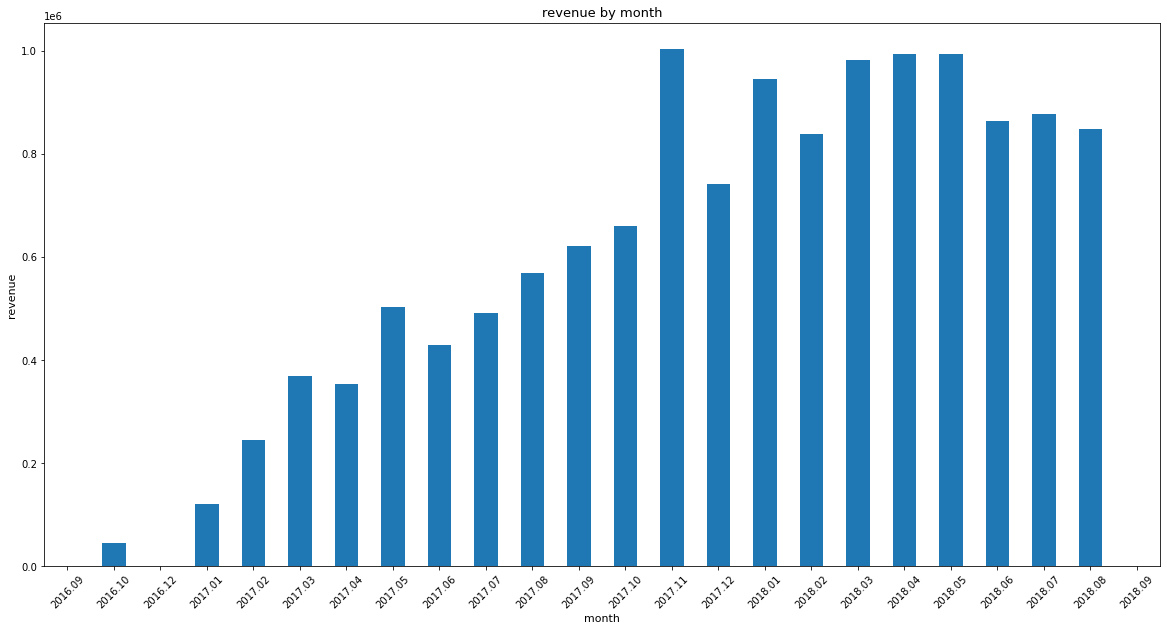

In [46]:
plot_bar(revenue_by_month, 'month', 'revenue', 'revenue by month')

### 요일별 매출

In [47]:
# 요일 알아내기
orders_integrated['order_purchase_timestamp'][0].dayofweek

6

In [48]:
# 요일별 합계
revenue_by_dayofweek = orders_integrated.set_index('order_purchase_timestamp').groupby(lambda date: date.dayofweek).sum()['price']
revenue_by_dayofweek

order_purchase_timestamp
0    2209954.95
1    2163486.32
2    2099718.06
3    1996006.74
4    1951765.20
5    1496661.79
6    1576807.68
Name: price, dtype: float64

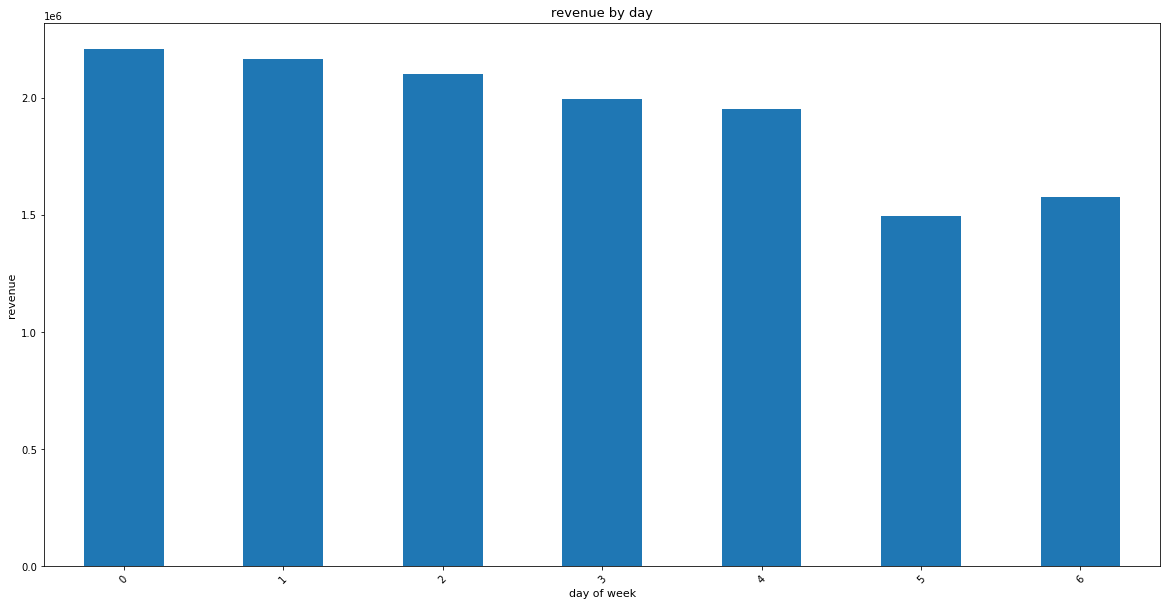

In [49]:
# 그래프
plot_bar(revenue_by_dayofweek, 'day of week', 'revenue', 'revenue by day')

### 시간별 매출

In [50]:
# 시간별 합계
revenue_by_hour = orders_integrated.set_index('order_purchase_timestamp').groupby(lambda date: date.hour).sum()['price']
revenue_by_hour

order_purchase_timestamp
0     313415.57
1     149642.53
2      54754.52
3      35329.70
4      24281.59
5      22074.01
6      56409.30
7     152054.28
8     391013.99
9     676008.07
10    830369.51
11    867630.63
12    834020.42
13    863487.23
14    942135.74
15    899556.34
16    928555.95
17    831307.92
18    816767.00
19    819978.14
20    847299.39
21    831471.58
22    783932.64
23    522904.69
Name: price, dtype: float64

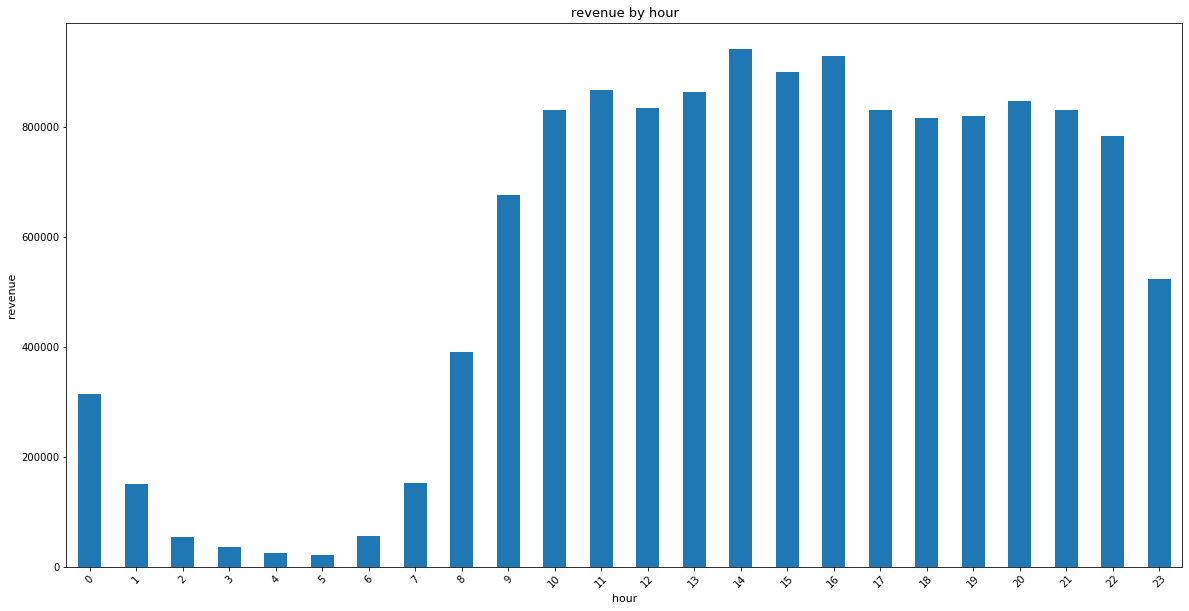

In [51]:
# 그래프
plot_bar(revenue_by_hour, 'hour', 'revenue', 'revenue by hour')

### 카테고리별 매출

In [52]:
revenue_by_category = orders_integrated.groupby('product_category').sum()['price']
revenue_by_category = revenue_by_category.sort_values(ascending = False)
revenue_by_category

product_category
health_beauty                1255695.13
watches_gifts                1198185.21
bed_bath_table               1035964.06
sports_leisure                979740.92
computers_accessories         904322.02
                                ...    
flowers                         1110.04
home_comfort_2                   760.27
cds_dvds_musicals                730.00
fashion_childrens_clothes        569.85
security_and_services            283.29
Name: price, Length: 74, dtype: float64

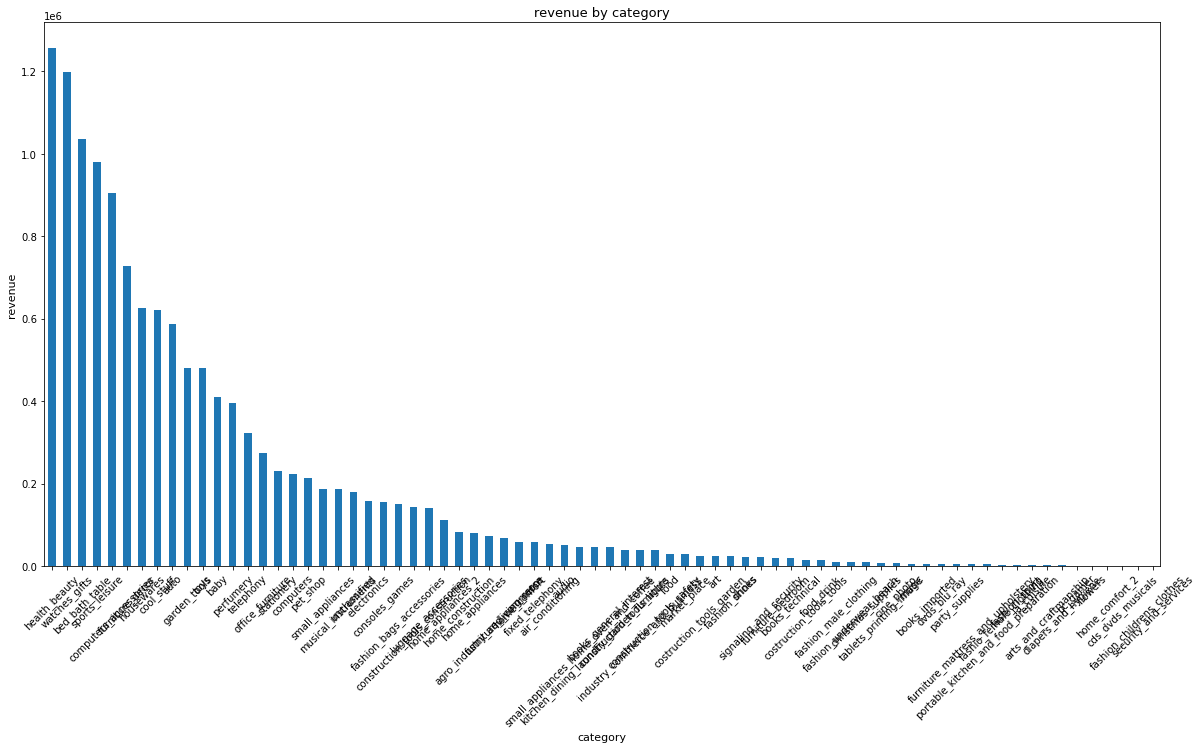

In [53]:
# 그래프
plot_bar(revenue_by_category, 'category', 'revenue', 'revenue by category')

In [54]:
revenue_by_category_ascd = revenue_by_category.sort_values()
revenue_by_category_ascd

product_category
security_and_services            283.29
fashion_childrens_clothes        569.85
cds_dvds_musicals                730.00
home_comfort_2                   760.27
flowers                         1110.04
                                ...    
computers_accessories         904322.02
sports_leisure                979740.92
bed_bath_table               1035964.06
watches_gifts                1198185.21
health_beauty                1255695.13
Name: price, Length: 74, dtype: float64

<AxesSubplot:ylabel='product_category'>

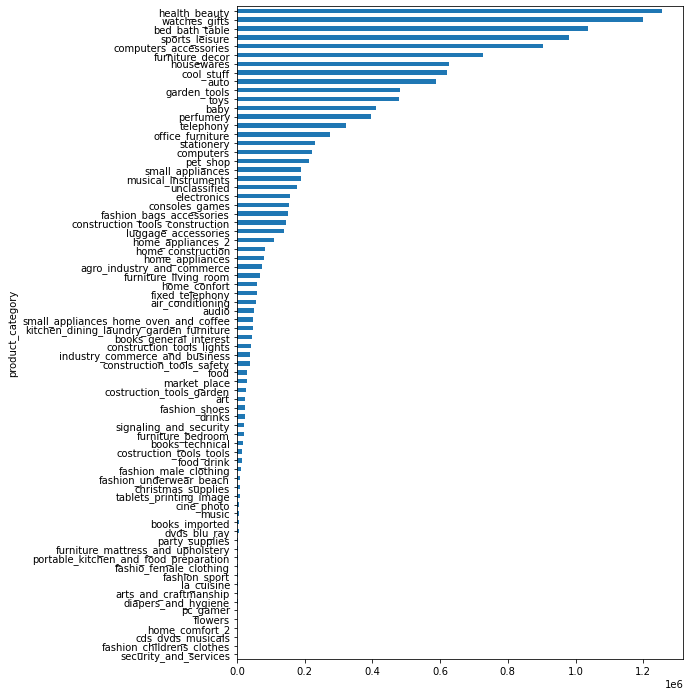

In [55]:
revenue_by_category_ascd.plot(kind = 'barh', x = 'category', y = 'revenue', figsize = (8,12))

In [56]:
#카테고리가 꽤나 많아서 상위 몇개를 추려보기로 함.
revenue_by_category_ascd_perc = revenue_by_category_ascd / sum(orders_integrated['price']) * 100
sum(revenue_by_category_ascd_perc.tail(20))

84.04394725266503

<AxesSubplot:ylabel='product_category'>

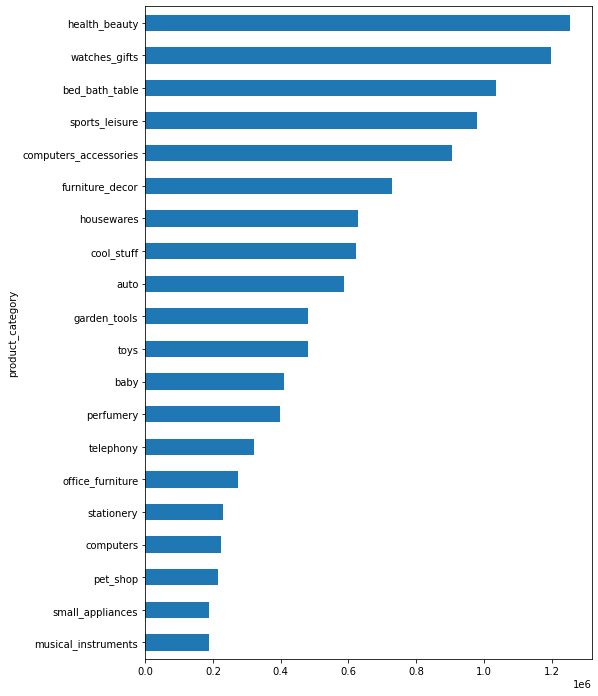

In [57]:
# 매출 약 84%를 차지하는 상위 20개 카테고리만 그래프로 확인
revenue_by_category_ascd_top20 = revenue_by_category_ascd.tail(20)
revenue_by_category_ascd_top20.plot(kind = 'barh', x = 'category', y = 'revenue', figsize = (8,12))

### 매출이 가장 높았던 top 5 월의 카테고리별 매출

In [58]:
#매출이 가장 높았던 달 5개 찾기
revenue_by_month.sort_values(ascending = False).head()

order_purchase_timestamp
2017.11    1003862.14
2018.04     993592.98
2018.05     992871.75
2018.03     981051.06
2018.01     945456.29
Name: price, dtype: float64

In [59]:
#orders_integrated 에서 해당 월에 해당하는 행 가져오기

orders_nov_2017 = orders_integrated[(orders_integrated['order_purchase_timestamp'] >= '2017-11-01') & (orders_integrated['order_purchase_timestamp'] <= '2017-11-30')]
orders_nov_2017

,order_id,quantity,product_id,seller_id,price,freight_value,product_category,customer_id,order_purchase_timestamp
36039,9808a7f5f5446817c3ebf7a804111d53,1,b9775d8418a0f0dd37b53431e90572a5,7040e82f899a04d1b434b795a43b4617,24.90,7.78,computers_accessories,b2e5428802f42f9f27ef4b4bdf20524e,2017-11-01 00:12:34
36040,c1055c3c83d15a7d43c7b6e3f283ae53,1,a8949536a84721e346d7814fd81aafbe,729f06993dac8e860d4f02d7088ca48a,179.90,14.37,pet_shop,b7f21cec11d35a647deee185c3881474,2017-11-01 00:24:57
36041,ed130013de4053d7678825d4d8e7deb1,1,72172e982e8b92155069e4201c92c0bb,9b013e03b2ab786505a1d3b5c0756754,36.49,9.27,sports_leisure,fcae9bab891c06e469b167898af43631,2017-11-01 00:43:33
36042,08b450b388221bfe5472ed23887a7564,1,9a803c36a15de3fd981f42c0e4cabdea,df56d7b40d437f88407c5f78b63bc328,145.90,21.51,sports_leisure,48484f48de7aa7c06c79b32d8a232793,2017-11-01 01:48:36
36043,af29f3d2878958723720a759676814e7,1,5b45b90d432972e54f815d543084e6ae,5b581417df4480f632484ba681e53944,149.90,98.02,toys,3380dbe062b329f11a5e5de5552c5c34,2017-11-01 01:52:21
...,...,...,...,...,...,...,...,...,...
44365,0ee62a44a21a9b7a751c01451bfcf512,1,f20a14d45e85b05ef554d10d7283f7da,2138ccb85b11a4ec1e37afbd1c8eda1f,39.99,15.10,telephony,e46601b6f6937b2acf0d1850df0b6816,2017-11-29 23:46:32
44366,c3e622f24839ec7bd509af46cc7cde22,1,a7c73814e6894bc049f7aac7d37f7175,6f892e20a171e98efe17fdb971ff319b,279.90,16.71,telephony,18f8b1df349834d30e2e56ae266236ee,2017-11-29 23:47:39
44367,77850ecb19783b9c81c2097568e6b4d3,1,b8212b3bd65a9c7070e474f1430c94de,40d54b51e962dbe09cabbcfd33298dee,498.90,12.31,health_beauty,933c5933d4324bed8e5a71e0d29aa42a,2017-11-29 23:50:48
44368,aafa7e2a173735576439ec483f27fa5f,1,978859c6048ded0fa8bf3b9ea8236387,813348c996469b40f2e028d5429d3495,15.30,14.10,housewares,8d6edf29c381a45a93d59919b6cdaae5,2017-11-29 23:56:24


In [60]:
revenue_by_category_nov_2017 = (orders_nov_2017.groupby('product_category').sum()['price']).sort_values()
revenue_by_category_nov_2017

product_category
home_comfort_2               38.70
fashion_sport                59.90
art                          75.00
dvds_blu_ray                 79.79
fashio_female_clothing       79.88
                            ...   
furniture_decor           61339.10
computers_accessories     69553.90
health_beauty             77006.55
bed_bath_table            86493.87
watches_gifts             92771.08
Name: price, Length: 66, dtype: float64

<AxesSubplot:ylabel='product_category'>

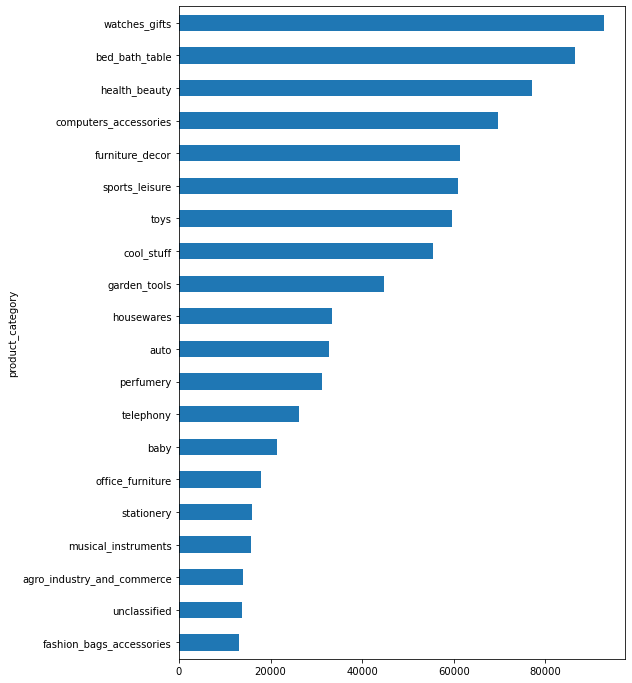

In [61]:
revenue_by_category_nov_2017.tail(20).plot(kind = 'barh', x = 'category', y = 'revenue', figsize = (8,12))

In [62]:
orders_apr_2018 = orders_integrated[(orders_integrated['order_purchase_timestamp'] >= '2018-04-01') & (orders_integrated['order_purchase_timestamp'] <= '2018-04-30')]
orders_apr_2018

,order_id,quantity,product_id,seller_id,price,freight_value,product_category,customer_id,order_purchase_timestamp
74930,705402bc1d956067338873d414158d09,1,13b65def7883556df481f81caf3908c2,1835b56ce799e6a4dc4eddc053f04066,149.90,18.93,bed_bath_table,35a436968e81c497c7f713bac80c42d0,2018-04-01 00:11:32
74931,b1a7bd6a9d10076c91e88bc510406b46,1,3bf87d2001b8176e6a3ad804b80774b4,7c67e1448b00f6e969d365cea6b010ab,192.99,64.67,office_furniture,042b53f9e609289d8f6fcbd59b4acf63,2018-04-01 00:27:33
74932,b1a7bd6a9d10076c91e88bc510406b46,2,30de9bc2bc110c6a584cacba9c17d88a,7c67e1448b00f6e969d365cea6b010ab,192.99,64.67,office_furniture,042b53f9e609289d8f6fcbd59b4acf63,2018-04-01 00:27:33
74933,5297250ba3bfb18713834a6b28d6725d,1,16ed6a6e3fce23b741650437fe58d65b,e5a38146df062edaf55c38afa99e42dc,89.18,8.98,housewares,585908a498f0b6ea9258ab3a3db3a9bc,2018-04-01 00:35:23
74934,e05885007043bb1e8f723ff2d4f5aa4d,1,a2105c8c0d5d99dbc5a2a9ad94321e5c,0dd184061fb0eaa7ca37932c68ab91c5,105.00,23.27,sports_leisure,9970950b99d6e4d72f5f8d2843099733,2018-04-01 00:39:57
...,...,...,...,...,...,...,...,...,...
82597,7264146dc0b366ab7e89b2f947bff7ef,1,483691880798b6f0f657c203494cfe3a,5a05a16bb50629ee31afab8a6d4c2674,51.50,19.33,housewares,b755f062c2c480beb455b40627f6dfd7,2018-04-29 23:43:15
82598,3653a619f7a0b6e676d9dab8755581aa,1,380b4664ba5bb18cc9db78ee6bac3558,6560211a19b47992c3666cc44a7e94c0,29.00,18.23,watches_gifts,454b4ba4ae47ea08a0a94cece37090d9,2018-04-29 23:53:46
82599,a95678d13aa1133eda68827e63e5f769,1,658fc236815a88341f858edcdb0ec78a,0ed6ce5d87fd9c69eaacaeb778d67235,72.90,27.06,housewares,1b49d294f87dff4d42dbe0a33b640e05,2018-04-29 23:56:01
82600,43879d5f6ffdb1c8f3a9c4a4f2ffe548,1,9fef57f37ae72292952e73ff9a7a3fee,f8db351d8c4c4c22c6835c19a46f01b0,449.90,194.64,kitchen_dining_laundry_garden_furniture,0e412c4ec24391b80003616b950bd7ed,2018-04-29 23:56:41


In [63]:
revenue_by_category_apr_2018 = (orders_apr_2018.groupby('product_category').sum()['price']).sort_values()
revenue_by_category_apr_2018

product_category
home_comfort_2               12.90
arts_and_craftmanship        15.99
party_supplies               43.80
tablets_printing_image       52.00
cds_dvds_musicals            65.00
                            ...   
computers_accessories     57217.49
sports_leisure            65444.24
bed_bath_table            69344.73
health_beauty             87732.99
watches_gifts             88921.06
Name: price, Length: 69, dtype: float64

<AxesSubplot:ylabel='product_category'>

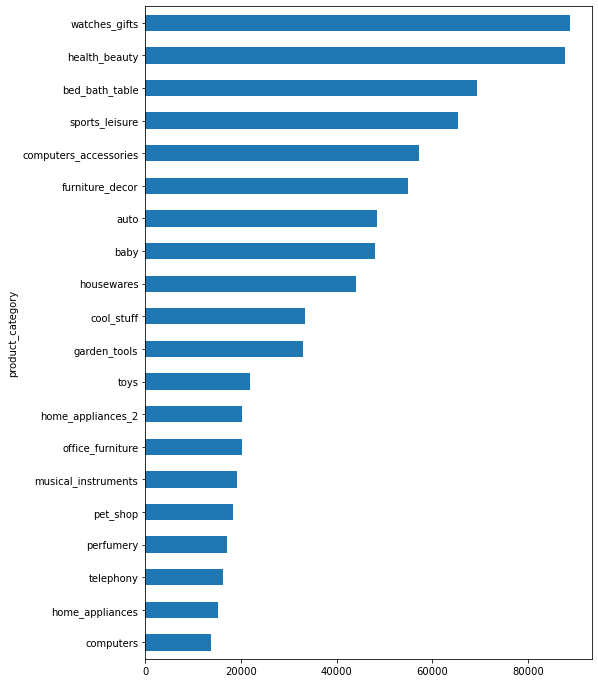

In [64]:
revenue_by_category_apr_2018.tail(20).plot(kind = 'barh', x = 'category', y = 'revenue', figsize = (8,12))

In [65]:
orders_may_2018 = orders_integrated[(orders_integrated['order_purchase_timestamp'] >= '2018-05-01') & (orders_integrated['order_purchase_timestamp'] <= '2018-05-31')]
orders_may_2018

,order_id,quantity,product_id,seller_id,price,freight_value,product_category,customer_id,order_purchase_timestamp
82887,9694aa09499321709cdb542840ebbbb2,1,71da6d6632902431cdca2b3a8e681b80,3078096983cf766a32a06257648502d1,229.69,24.19,health_beauty,18cf90f4d4f765bd1ca02c2af5e214ea,2018-05-01 00:02:11
82888,43d6e5bfdbbfac022b7dad46056dfa64,1,7bdc3ff2d6af39d08fb40546ba7b9766,57e632711dec9ec14ca7546769483e7e,21.90,18.23,perfumery,6e87b43c60c9c1cb6d51732a3b238f95,2018-05-01 00:36:33
82889,43d6e5bfdbbfac022b7dad46056dfa64,2,7bdc3ff2d6af39d08fb40546ba7b9766,57e632711dec9ec14ca7546769483e7e,21.90,18.23,perfumery,6e87b43c60c9c1cb6d51732a3b238f95,2018-05-01 00:36:33
82890,706f426a3e276fbc171e2d3aafbf2e1a,1,4af41a3530a95522cbfcff5ad13522eb,c963a25b8671419c6ce9eebe8fd03218,49.00,19.32,furniture_decor,dc745d5f5de1082bd0aebd9d8aec53d8,2018-05-01 01:28:38
82891,0094bd07f49fed90209ffa62d1ef26d6,1,d64e758afad411049a45e42c9a259241,5670f4db5b62c43d542e1b2d56b0cf7c,11.53,7.39,perfumery,de0c1a4d8c367c58d66e61dfa379f4cf,2018-05-01 02:04:16
...,...,...,...,...,...,...,...,...,...
90634,9457f83b9faf36f40019d656cb5679f1,1,8a443635fdf9759915c9be5be2e3b862,da8622b14eb17ae2831f4ac5b9dab84a,109.90,11.86,bed_bath_table,a6981c9a8bc899ed4f22b9e5b70796a1,2018-05-30 23:21:15
90635,2e355f2c21d0eadf3b8202cb969363c7,1,eb54d6afabdf1f96c248b81dec8f180f,7299e27ed73d2ad986de7f7c77d919fa,149.99,14.17,consoles_games,567edfb9219ec706653d253ba2759119,2018-05-30 23:21:36
90636,177a359958777d9b5cebb4257016c35c,1,3dd2a17168ec895c781a9191c1e95ad7,de722cd6dad950a92b7d4f82673f8833,149.90,25.18,computers_accessories,6326db5a7fa1bed7b29c5a8c08a3d4c9,2018-05-30 23:33:44
90637,f6b99780deb1f264dee5f8b809a3a34f,1,fc1d8637c0268af3db482c14b7ef8e75,da8622b14eb17ae2831f4ac5b9dab84a,149.90,12.14,bed_bath_table,adb5acf675d7aa2740ab319260930714,2018-05-30 23:55:46


In [66]:
revenue_by_category_may_2018 = (orders_may_2018.groupby('product_category').sum()['price']).sort_values()
revenue_by_category_may_2018

product_category
flowers                       16.40
tablets_printing_image        49.90
arts_and_craftmanship         89.80
party_supplies               100.70
diapers_and_hygiene          117.00
                            ...    
sports_leisure             58530.05
housewares                 61853.00
bed_bath_table             70183.99
health_beauty              91277.96
watches_gifts             116020.62
Name: price, Length: 65, dtype: float64

<AxesSubplot:ylabel='product_category'>

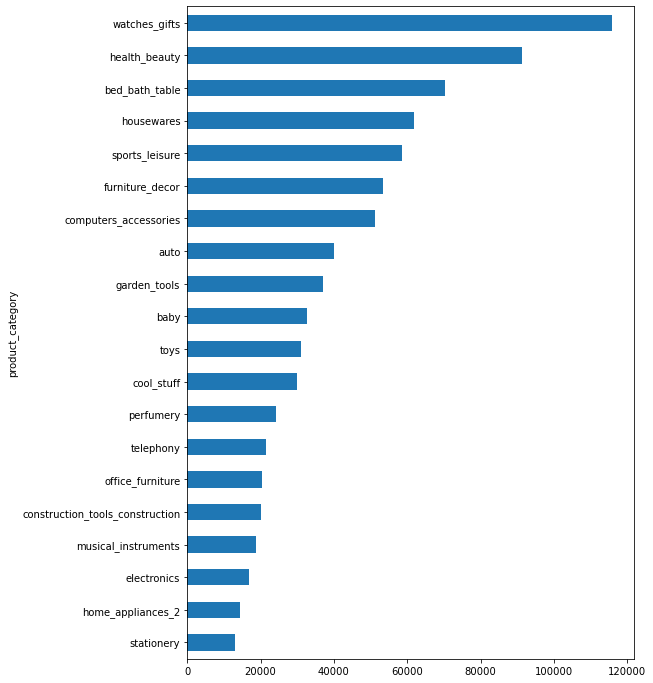

In [67]:
revenue_by_category_may_2018.tail(20).plot(kind = 'barh', x = 'category', y = 'revenue', figsize = (8,12))

In [68]:
orders_mar_2018 = orders_integrated[(orders_integrated['order_purchase_timestamp'] >= '2018-03-01') & (orders_integrated['order_purchase_timestamp'] <= '2018-03-31')]
orders_mar_2018

,order_id,quantity,product_id,seller_id,price,freight_value,product_category,customer_id,order_purchase_timestamp
66735,055b1b19fcb7ec836c23f44053344b20,1,e07f6e9343cad06f34d0a7a09eeac4d7,5debea795b07621e1f90532e18f96145,28.58,12.48,health_beauty,74f84652fb83fc62d4428d8800ac4d4c,2018-03-01 00:00:00
66736,b5b967cc29ff5ce57bb11ffd9c2e9101,1,7b85e3deef35afd6ebed5461ee8f0641,ede0c03645598cdfc63ca8237acbe73d,30.21,15.10,computers_accessories,fe00a52c6e20dd4cd53891d93b363977,2018-03-01 00:00:37
66737,ae825c311734d9ebfd9e6e67a8e3625e,1,e8b61f78db501ea0ca45677d1ca27de2,3d871de0142ce09b7081e2b9d1733cb1,29.00,12.69,toys,9ed9fc5345920a68a9d9f08fb58e61bc,2018-03-01 00:09:51
66738,e3d7c52182ad0917d1d2dd351dc1ef3a,1,3ce21e38e6a3060c20f4e74bdab770c8,1b938a7ec6ac5061a66a3766e0e75f90,64.90,17.16,baby,a66532abc4d021fe04fa2a8e8ad63381,2018-03-01 00:15:48
66739,409e6afee2a8d16df0be7d30f6278067,1,675921526583e0b3096c3f811d46a7a0,52ac6f920b7280e4c6d30dd94de6259b,499.90,101.29,office_furniture,b174fb91c364d103fdbe5b9ccd95a991,2018-03-01 00:40:25
...,...,...,...,...,...,...,...,...,...
74732,fd9b8ed51e5ffedf7a56bea36cc5b6f9,1,0ef8c1b31d81d6b4453f70a61321f73e,fa1a9dec3a9940c072684a46728bf1fc,119.90,23.42,pet_shop,0385c03f2b10a0a50ee72d8e3649a4b3,2018-03-30 23:11:40
74733,bf016dc3001d212ba8bd4870b721dcca,1,9c7f6d8c7ecb53b1ded940560fad344a,f5b44895715ddfe3087dc414f30268f3,27.90,18.23,auto,0d007bf3edacf8f9b4cf26e3065cb95c,2018-03-30 23:13:32
74734,d3842b5388a1a39f220c1fecd16807a6,1,a237de12bdf0bfe4fe220bae65a89731,6c7d50c24b3ccd2fd83b44d8bb34e073,45.91,5.31,furniture_decor,9999a835a6a953d5d95e3d0d09946f6e,2018-03-30 23:27:37
74735,d3842b5388a1a39f220c1fecd16807a6,2,2a5806f10d0f00e5ad032dd2e3c8806e,7c67e1448b00f6e969d365cea6b010ab,169.99,30.36,office_furniture,9999a835a6a953d5d95e3d0d09946f6e,2018-03-30 23:27:37


In [69]:
revenue_by_category_mar_2018 = (orders_mar_2018.groupby('product_category').sum()['price']).sort_values()
revenue_by_category_mar_2018

product_category
home_comfort_2                  34.99
dvds_blu_ray                    49.80
fashion_childrens_clothes       79.98
flowers                         89.67
fashion_sport                   89.90
                               ...   
bed_bath_table               66408.25
computers_accessories        83864.95
sports_leisure               83921.14
health_beauty                88702.19
watches_gifts                94824.38
Name: price, Length: 66, dtype: float64

<AxesSubplot:ylabel='product_category'>

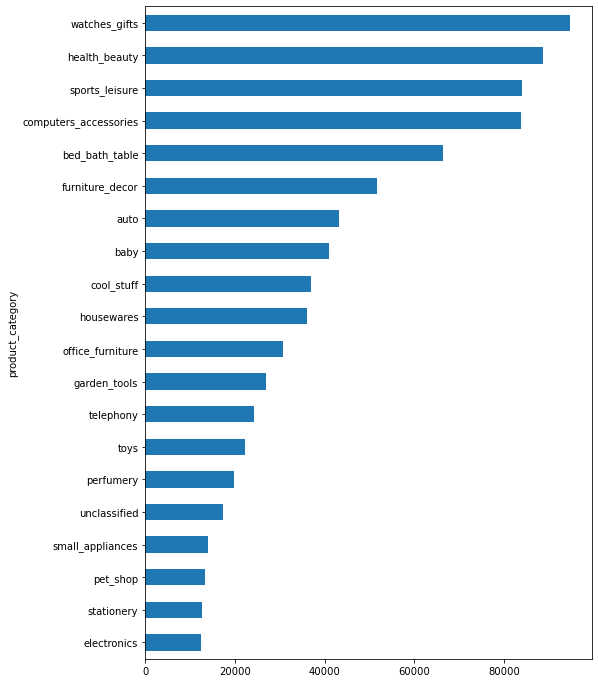

In [70]:
revenue_by_category_mar_2018.tail(20).plot(kind = 'barh', x = 'category', y = 'revenue', figsize = (8,12))

In [71]:
orders_jan_2018 = orders_integrated[(orders_integrated['order_purchase_timestamp'] >= '2018-01-01') & (orders_integrated['order_purchase_timestamp'] <= '2018-01-31')]
orders_jan_2018

,order_id,quantity,product_id,seller_id,price,freight_value,product_category,customer_id,order_purchase_timestamp
50965,4f6daad34df49e10c8072b33faafcb2a,1,468a4d241243dd96169888c0ad022086,e067ad2c1c0b48758eb1b5228bcf7a68,148.0,36.36,pet_shop,73eb345e2b03af4125d07ca4a250d06a,2018-01-01 02:48:41
50966,0462bad26ccfb8508951beb9ea398ae1,1,d93d7e81a8d724c4ef661e75647cf325,5a93f3ab0ef4c84ed5e1b5dbf23978bc,151.2,18.31,baby,b1449a43a666cba48f485fff0a509b8e,2018-01-01 08:37:46
50967,fbe41a4974e4a492e085d90e5be0b3e3,1,a096400f2b6fbe9c868f7dd5f1333e5a,cbd996ad3c1b7dc71fd0e5f5df9087e2,43.2,11.85,sports_leisure,3afe7d56a3df6e202fc6b851b1cfce3b,2018-01-01 08:45:04
50968,67a98eaf984ba84c596f9f5456634f20,1,c4baedd846ed09b85f78a781b522f126,a1043bafd471dff536d0c462352beb48,139.0,50.84,garden_tools,b2706ca3ca9a2846e387cb6ed9e74c5a,2018-01-01 09:36:21
50969,7d0a0773edc4bdca0ef6ab55777718a7,1,be5679ce5a2343c40455223d7bef6dfb,643214e62b870443ccbe55ab29a4dccf,99.0,7.95,fashion_bags_accessories,a5c957468ed6f0d66633b446e17e9865,2018-01-01 10:24:03
...,...,...,...,...,...,...,...,...,...
58852,e623ce1206781e57a58020bca18aeb28,1,8c5876b1c7768217964f353bc7e64393,0db783cfcd3b73998abc6e10e59a102f,49.0,25.63,telephony,6d71f3c2700fcf29edc036e602af2088,2018-01-30 23:41:41
58853,9f1d0b98c248d6afcfd3c708a723edf8,1,28ce57ecf4afba85e6020ec0209cada9,dc317f341ab0e22f39acbd9dbf9b4a1f,249.9,69.21,cool_stuff,ee346cba5a3efbdd8663133d9ff755e8,2018-01-30 23:42:58
58854,b27f1c7278213dfd73349efe9f917974,1,d017a2151d543a9885604dc62a3d9dcc,6560211a19b47992c3666cc44a7e94c0,49.0,16.79,fashion_bags_accessories,57b7db7fc8a60f117c4ca88ba371d5a0,2018-01-30 23:56:06
58855,b6ab72d17de0a5c4bdf888f55c9acb4b,1,c9dbe2eec19a8093cb5ac57486531c18,cca3071e3e9bb7d12640c9fbe2301306,96.9,13.70,bed_bath_table,ec201fc4260520724e8ed826a03bfbf9,2018-01-30 23:59:17


In [72]:
revenue_by_category_jan_2018 = (orders_jan_2018.groupby('product_category').sum()['price']).sort_values()
revenue_by_category_jan_2018

product_category
music                        24.97
dvds_blu_ray                 49.80
fashio_female_clothing       95.89
la_cuisine                  112.00
fashion_sport               119.80
                            ...   
health_beauty             70663.56
watches_gifts             70948.92
bed_bath_table            73276.45
computers_accessories     77765.66
sports_leisure            88648.62
Name: price, Length: 67, dtype: float64

<AxesSubplot:ylabel='product_category'>

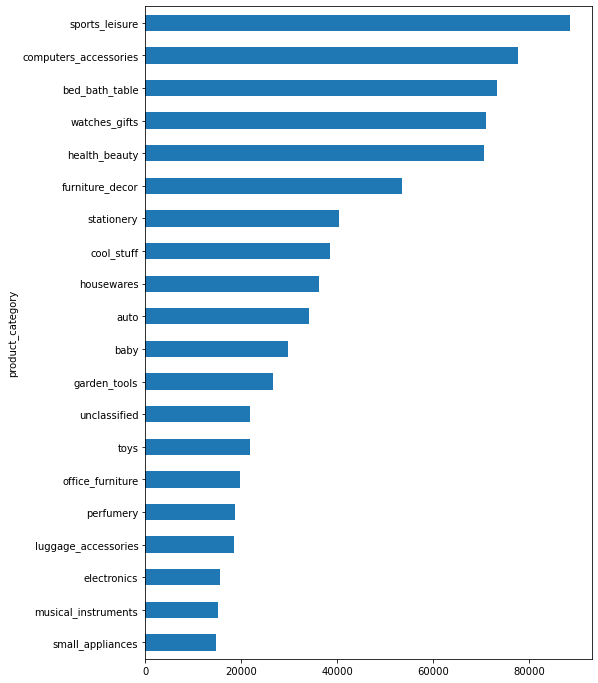

In [73]:
revenue_by_category_jan_2018.tail(20).plot(kind = 'barh', x = 'category', y = 'revenue', figsize = (8,12))

각 년도 3, 4, 5월 1등 카테고리 분석

In [74]:
#17년 3월
orders_mar_2017 = orders_integrated[(orders_integrated['order_purchase_timestamp'] >= '2017-03-01') & (orders_integrated['order_purchase_timestamp'] <= '2017-03-31')]
orders_mar_2017

,order_id,quantity,product_id,seller_id,price,freight_value,product_category,customer_id,order_purchase_timestamp
3237,7d0a7957897551b77224fc297e8f6046,1,abe6b1e401ce596ad0c493aeedb488a4,c847e075301870dd144a116762eaff9a,29.90,22.28,cool_stuff,b8936eebb611c6af9b609ed39594c33a,2017-03-01 00:01:30
3238,31a606477f15f8ff5f8417bb46f83a5e,1,078cec63541a67851b9057468288f722,4ebdc7e6cd6102a022dadc49156d4ea8,39.00,10.96,housewares,94889e991b908bed85be6550b6f60e11,2017-03-01 00:12:13
3239,b80d00e60a179d02f242e3f420023c78,1,027cdd14a677a5834bc67a9789db5021,620c87c171fb2a6dd6e8bb4dec959fc6,99.90,18.13,perfumery,283081efda8421b64dceba3e98ed43ab,2017-03-01 00:44:11
3240,7aa50aad959e4345b45b9732bc346a6e,1,e891d4a9622cae3b9fc2ec558bda155b,e603cf3fec55f8697c9059638d6c8eb5,27.00,16.05,unclassified,f0426deff141dffab4da4832186f4a36,2017-03-01 02:16:01
3241,5317d6f0c0b5822201596d8f4aabdc6e,1,242e1933d9cb1c789d3c6a3f2d083ba0,e48b04bf1aa1ef711caebeb7aede6180,158.90,29.28,toys,061ef7eda5cb54d9ccde7f54ea98f7fc,2017-03-01 06:24:20
...,...,...,...,...,...,...,...,...,...
6134,4b59288fdfd1ef916c5bdb63ee33d987,1,6f33a4a09ae1180a0ee1ff4682b2d21f,725c32fa80c2faacc4fc88450d27314e,139.99,12.37,toys,feced49097543a5b319c39654f895082,2017-03-30 22:30:52
6135,925f43c2d4991e4360c5a7435c5431a3,1,ab616e3e77440ec426347964a3489108,9add47bf45ce8e8c7db6b9cf670b1e09,65.90,21.93,furniture_decor,51099d172d85ee8e5693acfcbbd0f0a9,2017-03-30 22:38:45
6136,1ea11b975aea60ca92fa0559184d3d34,1,7514a3aab09ede7053ace487b3c89873,41b39e28db005d9731d9d485a83b4c38,49.90,14.52,bed_bath_table,0d1679b303ad5d2c0cb3e51bc9c9f643,2017-03-30 23:04:33
6137,ab37ec75cad1f09d8ec5c5a4228eaf50,1,21caff3913095987c249438138d0ef23,2138ccb85b11a4ec1e37afbd1c8eda1f,24.90,14.52,telephony,d81c43db155254f98cce1de0d6026bed,2017-03-30 23:33:36


<AxesSubplot:ylabel='product_category'>

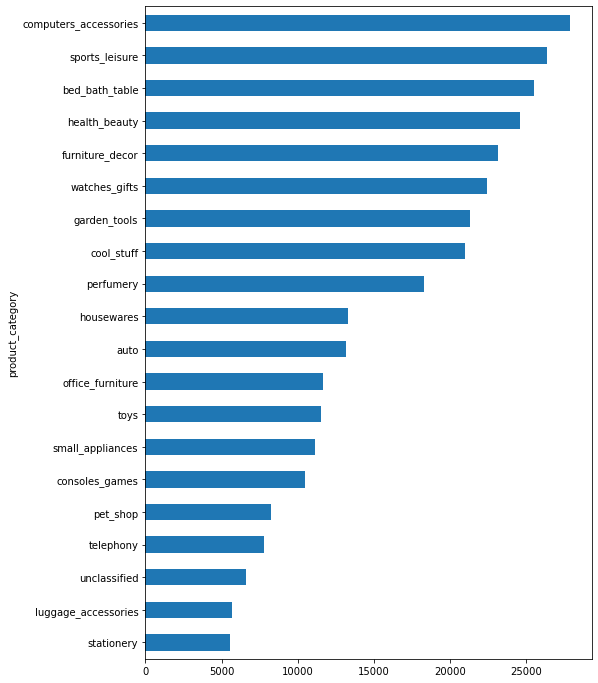

In [77]:
revenue_by_category_mar_2017 = (orders_mar_2017.groupby('product_category').sum()['price']).sort_values()
revenue_by_category_mar_2017.tail(20).plot(kind = 'barh', x = 'category', y = 'revenue', figsize = (8,12))

In [75]:
#17년 4월
orders_apr_2017 = orders_integrated[(orders_integrated['order_purchase_timestamp'] >= '2017-04-01') & (orders_integrated['order_purchase_timestamp'] <= '2017-04-30')]
orders_apr_2017

,order_id,quantity,product_id,seller_id,price,freight_value,product_category,customer_id,order_purchase_timestamp
6212,9d343b43e2a3552fdfaff5ad21a9af61,1,5e2ba75ad255ff60b1c76c5bf526ae9b,f84a00e60c73a49e7e851c9bdca3a5bb,69.90,14.25,health_beauty,a0c5cbf7dae5ccd736f5c2576bccf564,2017-04-01 00:54:10
6213,e49d81cefb427df79734efdb90023352,1,3f90ef42e637c17203bd0ee040c16de0,d2374cbcbb3ca4ab1086534108cc3ab7,25.90,10.96,bed_bath_table,9133fb73714e995e2a4426ea1753c3fd,2017-04-01 00:55:07
6214,fed4ca34aeb50d89ab8f08db03c8c800,1,3e591cbf1cec40074c24a2ce372a5b62,3faf68a3b0af94b10bac70d86077be49,188.99,15.09,unclassified,2c51d0c600a3cf399f2afad8a74ae1b1,2017-04-01 02:05:23
6215,c661253cb9754d5c570886f866e9e4c9,1,46f739c1cd676603026c0af4d29ef7a5,198c7ea11960a9844b544d9bcdca860c,139.99,21.06,auto,87fc1f623028e4400913dd7a684c8d3f,2017-04-01 06:25:30
6216,119be2d35bae88654dc45922a1ea3830,1,87d780fa7d2cf3710aa02dc4ca8db985,da8622b14eb17ae2831f4ac5b9dab84a,89.90,13.21,bed_bath_table,a376b08483daafb5a7c16988d7123cc0,2017-04-01 09:04:09
...,...,...,...,...,...,...,...,...,...
8796,2e557b5d820cbc4f2f0e25b3867f8033,2,dc68ee0fcb033a1ab6714fbb5db60c15,02d35243ea2e497335cd0f076b45675d,249.00,20.02,furniture_decor,04f3a7b250e3be964f01bf22bccdc602,2017-04-29 22:33:10
8797,6898fdd117fe6ca4f9b01eb03005d9a9,1,07f381c65e8e66460c07781b9b1b8834,7c67e1448b00f6e969d365cea6b010ab,239.99,53.23,office_furniture,cc3cd505183c2dbf100bfe8658b56cc4,2017-04-29 22:39:02
8798,fa3b973e0d6218a2905cf9808c158794,1,c5d8b84a90f73bd09c30e71e76caaa11,6039e27294dc75811c0d8a39069f52c0,79.90,20.64,market_place,ded41dd5d45a3f9b3d2d5bd45d0e9854,2017-04-29 22:56:36
8799,7beb8dfe9d03e7b0b7d7b811842a0fc0,1,c7c4e24200f7071aecf4a052fadb9473,0adac9fbd9a2b63cccaac4f8756c1ca8,109.90,19.47,housewares,781d3b0a052f4b0b790138d3cda4f1b0,2017-04-29 23:36:31


<AxesSubplot:ylabel='product_category'>

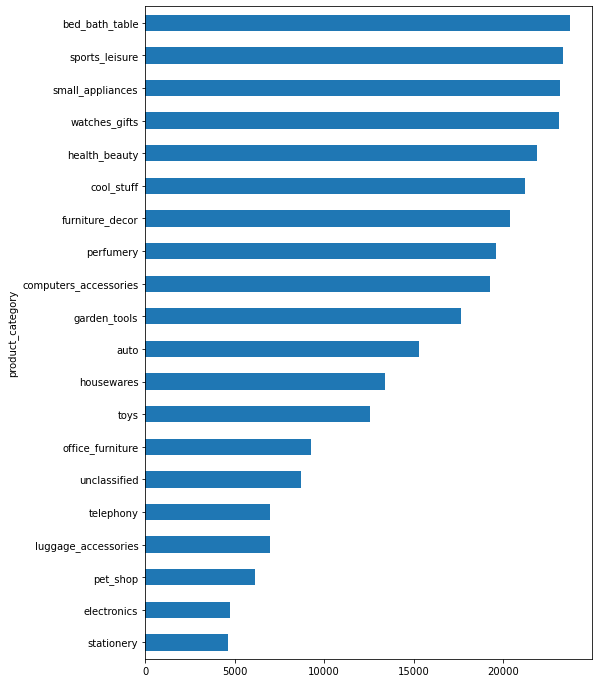

In [78]:
revenue_by_category_apr_2017 = (orders_apr_2017.groupby('product_category').sum()['price']).sort_values()
revenue_by_category_apr_2017.tail(20).plot(kind = 'barh', x = 'category', y = 'revenue', figsize = (8,12))

In [76]:
#17년 5월
orders_may_2017 = orders_integrated[(orders_integrated['order_purchase_timestamp'] >= '2017-05-01') & (orders_integrated['order_purchase_timestamp'] <= '2017-05-31')]
orders_may_2017

,order_id,quantity,product_id,seller_id,price,freight_value,product_category,customer_id,order_purchase_timestamp
8872,c9dbbd1ca9411200390b157cb42ea79a,1,9b00d5e140d71a265c6be7d132b32cd2,e067ad2c1c0b48758eb1b5228bcf7a68,60.90,14.60,pet_shop,10fe5969e9451138c0f393cf702f8495,2017-05-01 01:18:22
8873,55dfff244bc5d5f81d58d4148062c9b6,1,4094a0149a0f4da09703696fe235617c,cca3071e3e9bb7d12640c9fbe2301306,50.90,19.06,furniture_decor,94a06f5121bb1ef07a8be5ee510024ef,2017-05-01 08:29:14
8874,73689c18cffbd61ae75e2983453b4689,1,5f21301936c11698db6aee5444190da0,fe2032dab1a61af8794248c8196565c9,149.90,11.66,perfumery,7d95f28e19204d8967a228cd7ea11896,2017-05-01 08:58:52
8875,fd9486ae13f513ac59c3f6c23bb003c7,1,acdd9eaa79720ca045ce3768250b8e47,a416b6a846a11724393025641d4edd5e,99.90,12.09,health_beauty,b3533b37eba6b3bf4c05167aeac93673,2017-05-01 08:59:52
8876,fbe1661023a94e53d4ec2c938e38c8f2,1,ab9cf155f8280c3739b09fe341a185e8,92eb0f42c21942b6552362b9b114707d,13.98,14.52,telephony,4383f87d5f45debd945f3ffede25398a,2017-05-01 09:35:45
...,...,...,...,...,...,...,...,...,...
12834,ea37cd94a6d10959260b311f58cc5e0f,1,5094a8f7ab33cba35acfd43d100b3298,d91fb3b7d041e83b64a00a3edfb37e4f,161.70,8.88,home_appliances,6a830a6e6de059a41ba310fc217a6bd8,2017-05-30 23:02:35
12835,295a37d27898b26b2a3768bcff6f5dac,1,c73628b1c3144b2e0c9c88072f21a213,3f995f07c49d0d55a99d5c54957f7d81,99.00,15.44,auto,2b136f8cd495d93d9b5a47bf86fcad32,2017-05-30 23:18:08
12836,0ab29b3ae0c49bff1cfb0b0137c20da5,1,06c6e01186af8b98ee1fc9e01f9471e9,fc906263ca5083d09dce42fe02247800,39.90,16.79,computers_accessories,6ce08c3a8b69a46f5bd4f0acd2fa75da,2017-05-30 23:24:11
12837,6dddec4ff6cf5567af3fe54023e28500,1,3a7c9b0413d7b9cc7f4a18318fc5afb3,7a67c85e85bb2ce8582c35f2203ad736,129.99,15.66,cool_stuff,fc9338669f6991ca326f7b892001d021,2017-05-30 23:27:47


<AxesSubplot:ylabel='product_category'>

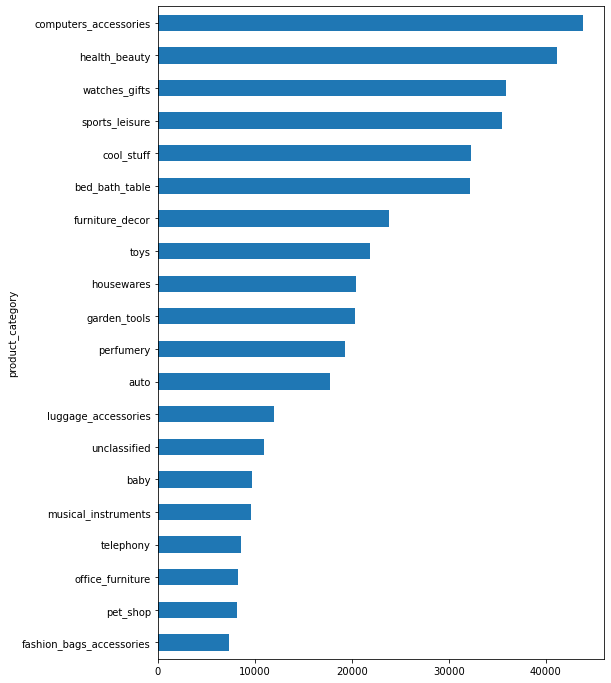

In [79]:
revenue_by_category_may_2017 = (orders_may_2017.groupby('product_category').sum()['price']).sort_values()
revenue_by_category_may_2017.tail(20).plot(kind = 'barh', x = 'category', y = 'revenue', figsize = (8,12))

In [83]:
# 11월 데이터는 2017년도 뿐이라 비교가 불가능하다
# orders_nov_2018 = orders_integrated[(orders_integrated['order_purchase_timestamp'] >= '2018-11-01') & (orders_integrated['order_purchase_timestamp'] <= '2018-11-30')]
# revenue_by_category_nov_2018 = (orders_nov_2018.groupby('product_category').sum()['price']).sort_values()
# revenue_by_category_nov_2018.tail(20).plot(kind = 'barh', x = 'category', y = 'revenue', figsize = (8,12))

각 년도 1월 1등 카테고리 분석

<AxesSubplot:ylabel='product_category'>

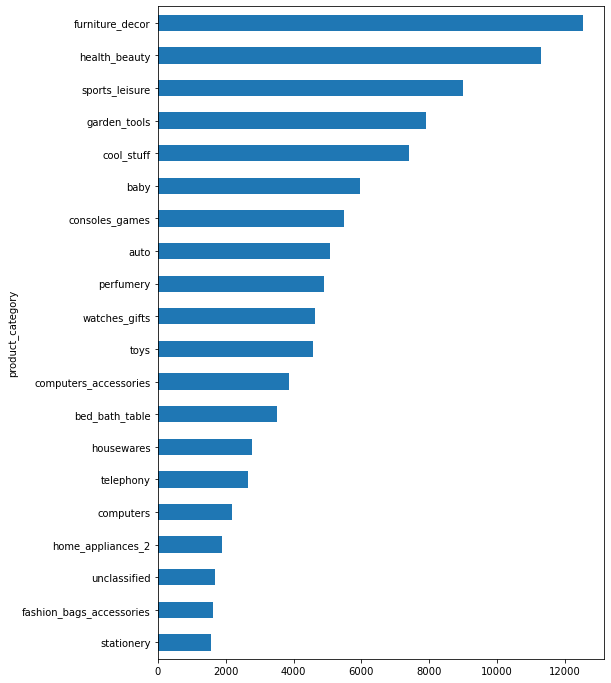

In [80]:
orders_jan_2017 = orders_integrated[(orders_integrated['order_purchase_timestamp'] >= '2017-01-01') & (orders_integrated['order_purchase_timestamp'] <= '2017-01-31')]
revenue_by_category_jan_2017 = (orders_jan_2017.groupby('product_category').sum()['price']).sort_values()
revenue_by_category_jan_2017.tail(20).plot(kind = 'barh', x = 'category', y = 'revenue', figsize = (8,12))

### 매출 인사이트

- 전체적인 매출은 상승 중

- 기간별 매출
    - 월별
        - 가장 높았던 달 5개는 17년 11월, 18년 1, 3, 4, 5월    
    - 요일별
        - 월요일이 가장 높고, 토요일이 가장 낮다.
    - 시간별
        - 오후 2시가 가장 높고, 새벽 5시가 가장 낮다.
        - 아침 10시~저녁 10시까지는 꾸준히 구매가 이뤄지는 모습
        
> 매출이 높았던 달의 데이터를 추가로 분석하여 해당 월마다의 대응 전략이 필요하다.<br>
> 평일에 비해 주말에 상대적으로 매출이 낮기 때문에, 평일에 더 많은 매출을 가져올 것인지, 부족한 주말 매출을 끌어올릴 것인지 프로모션/마케팅 측면에서 고민이 필요하다.<br>
    
- 카테고리별 매출
    - 가장 높은 카테고리는 health beauty
    - 전체 매출 약 84%는 상위 20개 카테고리에 집중
    - 특이점은 매출이 가장 높았던 달 5개의 최대 매출 카테고리는 watches_gifts이다. 18년 1월은 sports_leisure
    
> health beauty 카테고리는 꾸준히 매출 상위권으로, 신규 구매를 증진시키거나 재구매 유도 등으로 규모가 줄어들지 않게 유지하는 전략이 필요하다.<br>
> 선물이 필요한 시즌(3,4,5월)에 wathches_gifts 카테고리 관련 프로모션 등으로 매출을 증가시킬 전략이 도움될 것이다.<br>